In [154]:
import numpy as np
import pandas as pd
import tweepy
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
from __future__ import division
import matplotlib.pyplot as plt

In [155]:
TWITTER_CONSUMER_KEY = 'lErR8HLhxBMSPIDOygB8utQrw'
TWITTER_CONSUMER_SECRET = '3muWu9tjrIZCj2xW0C9XOnTTqXZJLCh7zaJMET080JIlOQP51c'
TWITTER_OAUTH_TOKEN = '249379058-bhzc4sMe8EwqppoXLLmgXZK9DvxeBJSlR6HafqeV'
TWITTER_OAUTH_SECRET = '4Dw9RKAyIAXCA61dFZuNuWcFpixAX7CJicnBU5cgtdh6P'

In [156]:
auth= tweepy.OAuthHandler(TWITTER_CONSUMER_KEY, TWITTER_CONSUMER_SECRET)
auth.set_access_token(TWITTER_OAUTH_TOKEN, TWITTER_OAUTH_SECRET)

In [157]:
api= tweepy.API(auth)
public_tweets=api.home_timeline()
for tweet in public_tweets:
    print tweet.text

Una vez que te olvides lo que vales, te olvidarás lo que te mereces
Graficos de 1H NY actualizados en nuestro sitio.Prueba EWF GRATIS&gt;https://t.co/hBwHydb3Wx #elliottwave #ondaselliott
Las medidas extremas para el nuevo año escolar https://t.co/t0yl9Tcm2Z https://t.co/zThdbR5oeF
A este grupito se le acabó el negocio de “narcobrownie” https://t.co/iKUV9Zsusc https://t.co/WJv7gQIxy3
Anuncia Angélica Rivera donación de 100 viviendas para Chiapas y Oaxaca  
https://t.co/F0E1Thuip5 https://t.co/c2fnnGoGOk
Amazing conversation with Schwarzman Scholars at Tsinghua University on the future of jobs, economy &amp; gender parity… https://t.co/gCWRu2Urwi
El hermano de Janet Jackson afirma que el matrimonio de la cantante escondía una "relación abusiva" https://t.co/dx76Oe8O73
Appeals court says Uber cannot move Waymo court fight to arbitration https://t.co/97EyVhlmZM
We test-drove 3 popular SUVs to find out which car blends the very finest in convenience, comfort, and performance… https://t.co/

In [158]:
def toDataFrame(tweets):
    dataset=pd.DataFrame()
    
    dataset['userID']=[tweet.user.id for tweet in tweets]
    dataset['id']=[tweet.id for tweet in tweets]
    dataset['userName']=[tweet.user.name for tweet in tweets]
    dataset['tweetText']=[tweet.text for tweet in tweets]
    dataset['tweetCreated']=[tweet.created_at for tweet in tweets]
    dataset['userLocation']=[tweet.user.location for tweet in tweets]
    
    dataset['url']=[tweet.source_url for tweet in tweets]
    dataset['Geo']=[tweet.geo for tweet in tweets]
    dataset['Usuario']=[tweet.user for tweet in tweets]
    dataset['Numero/Favs']=[tweet.favorite_count for tweet in tweets]
    
    return dataset

In [159]:
tweet_frame= toDataFrame(public_tweets)

In [160]:
tweet_frame

,userID,id,userName,tweetText,tweetCreated,userLocation,url,Geo,Usuario,Numero/Favs
0,125492611,907994532557590529,Mi Abuela Sabia,"Una vez que te olvides lo que vales, te olvida...",2017-09-13 15:49:00,"Cuenca, Ecuador",https://about.twitter.com/products/tweetdeck,None,"User(follow_request_sent=False, has_extended_p...",0
1,249955041,907994495635132416,Ondas Elliott,Graficos de 1H NY actualizados en nuestro siti...,2017-09-13 15:48:52,Miami - Londres - Madrid,https://about.twitter.com/products/tweetdeck,None,"User(follow_request_sent=False, has_extended_p...",0
2,4198346793,907994486801883138,EP | Social,Las medidas extremas para el nuevo año escolar...,2017-09-13 15:48:50,Mundo,http://www.ajaymatharu.com/,None,"User(follow_request_sent=False, has_extended_p...",0
3,4198346793,907994322255179776,EP | Social,A este grupito se le acabó el negocio de “narc...,2017-09-13 15:48:10,Mundo,http://www.ajaymatharu.com/,None,"User(follow_request_sent=False, has_extended_p...",0
4,1968333368,907994296875405312,Sin Censura Noticias,Anuncia Angélica Rivera donación de 100 vivien...,2017-09-13 15:48:04,"Querétaro, Querétaro Arteaga",http://www.facebook.com/twitter,None,"User(follow_request_sent=False, has_extended_p...",0
5,304909941,907994285898956800,Christine Lagarde,Amazing conversation with Schwarzman Scholars ...,2017-09-13 15:48:02,"Washington, DC",http://www.hootsuite.com,None,"User(follow_request_sent=False, has_extended_p...",2
6,7996082,907994281448787968,EL PAÍS,El hermano de Janet Jackson afirma que el matr...,2017-09-13 15:48:01,Madrid,https://about.twitter.com/products/tweetdeck,None,"User(follow_request_sent=False, has_extended_p...",1
7,15110357,907994262037565440,Reuters Business,Appeals court says Uber cannot move Waymo cour...,2017-09-13 15:47:56,Where you are,http://www.socialflow.com,None,"User(follow_request_sent=False, has_extended_p...",2
8,34713362,907994228453629953,Bloomberg,We test-drove 3 popular SUVs to find out which...,2017-09-13 15:47:48,New York and the World,http://snappytv.com,None,"User(follow_request_sent=False, has_extended_p...",42
9,4198346793,907994184048668672,EP | Social,¡Un poema! La cara de los ministros mientras M...,2017-09-13 15:47:37,Mundo,http://www.ajaymatharu.com/,None,"User(follow_request_sent=False, has_extended_p...",0


In [161]:
tweetsPorHora= tweet_frame[['userID','tweetCreated']]
tweetsPorHora.loc[:,('tweetCreated')]=tweetsPorHora['tweetCreated'].map(
    lambda x: x.strftime('%H:%M:%S') if x else '')
#tweetsPorHora
tweetsPorMinuto=tweet_frame[['userID','tweetCreated']]
tweetsPorMinuto.loc[:,('tweetCreated')]=tweetsPorMinuto['tweetCreated'].map(
    lambda x: x.strftime('%M') if x else '')
tweetsPorMinuto

,userID,tweetCreated
0,125492611,49
1,249955041,48
2,4198346793,48
3,4198346793,48
4,1968333368,48
5,304909941,48
6,7996082,48
7,15110357,47
8,34713362,47
9,4198346793,47


In [162]:
TpMDroped=tweetsPorMinuto.groupby('tweetCreated').count()
TpMDroped

,userID
tweetCreated,
46,2
47,9
48,6
49,1


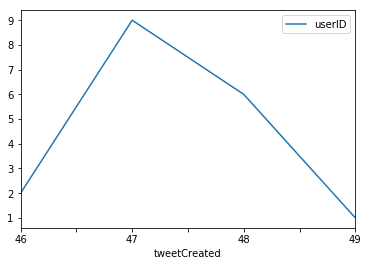

In [163]:
%matplotlib inline
TpMDroped.plot(legend=True)

In [164]:
tweetsPorFecha=tweet_frame[['tweetCreated','userID']]
#tweetsPorFecha['tweetCreated']=tweetsPorFecha['tweetCreated'].map(lambda x: x.strftime('%Y/%m/%d') if x else '')
tweetsPorFecha.loc[:,('tweetCreated')]=tweetsPorFecha['tweetCreated'].map(lambda x: x.strftime('%Y/%m/%d') if x else '')
tweetsPorFecha

,tweetCreated,userID
0,2017/09/13,125492611
1,2017/09/13,249955041
2,2017/09/13,4198346793
3,2017/09/13,4198346793
4,2017/09/13,1968333368
5,2017/09/13,304909941
6,2017/09/13,7996082
7,2017/09/13,15110357
8,2017/09/13,34713362
9,2017/09/13,4198346793


In [165]:
TpFDroped=tweetsPorFecha.groupby('tweetCreated').count()
TpFDroped

,userID
tweetCreated,
2017/09/13,18


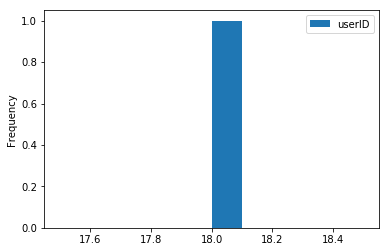

In [166]:
%matplotlib inline
TpFDroped.plot(kind='hist', legend=True)

In [167]:
tweetsPorLocacion= tweet_frame[['userLocation','userID']].groupby('userLocation').count()
tweetsPorLocacion

,userID
userLocation,
,1
Ciudad de México,2
"Cuenca, Ecuador",1
Madrid,1
Miami - Londres - Madrid,1
Mundo,4
New York and the World,2
"Querétaro, Querétaro Arteaga",2
"Times Square, New York",1


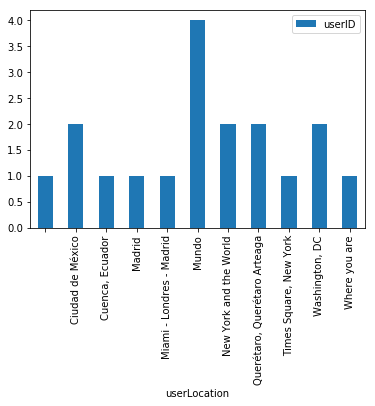

In [168]:
%matplotlib inline
tweetsPorLocacion.plot(kind='bar', legend=True)


In [169]:

api= tweepy.API(auth)
public_tweets=api.home_timeline()
for tweet in public_tweets:
    print tweet.text
%time 

Una vez que te olvides lo que vales, te olvidarás lo que te mereces
Graficos de 1H NY actualizados en nuestro sitio.Prueba EWF GRATIS&gt;https://t.co/hBwHydb3Wx #elliottwave #ondaselliott
Las medidas extremas para el nuevo año escolar https://t.co/t0yl9Tcm2Z https://t.co/zThdbR5oeF
A este grupito se le acabó el negocio de “narcobrownie” https://t.co/iKUV9Zsusc https://t.co/WJv7gQIxy3
Anuncia Angélica Rivera donación de 100 viviendas para Chiapas y Oaxaca  
https://t.co/F0E1Thuip5 https://t.co/c2fnnGoGOk
Amazing conversation with Schwarzman Scholars at Tsinghua University on the future of jobs, economy &amp; gender parity… https://t.co/gCWRu2Urwi
El hermano de Janet Jackson afirma que el matrimonio de la cantante escondía una "relación abusiva" https://t.co/dx76Oe8O73
Appeals court says Uber cannot move Waymo court fight to arbitration https://t.co/97EyVhlmZM
We test-drove 3 popular SUVs to find out which car blends the very finest in convenience, comfort, and performance… https://t.co/